# Configuración Inicial

In [63]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Rodrigo
[nltk_data]    |     Cooper\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\Rodrigo
[nltk_data]    |     Cooper\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to C:\Users\Rodrigo
[nltk_data]    |     Cooper\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to C:\Users\Rodrigo
[nltk_data]    |     Cooper\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to C:\Users\Rodrigo
[nltk_data]    |     Cooper\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to 

#Bi-gramas
* Parejas de palabras que ocurren consecutivas.

In [64]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)
md_bigrams[:10]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [65]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

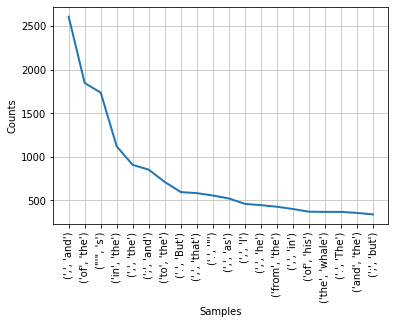

In [66]:
fdist.plot(20)

## Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

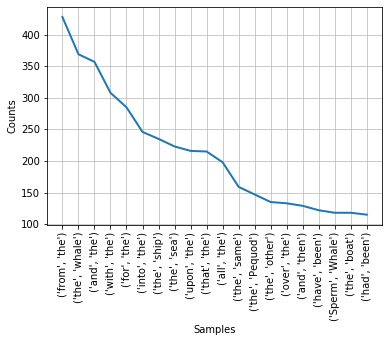

In [67]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20);

# Tri-gramas

In [68]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))
fdist = FreqDist(md_trigrams)
md_trigrams[:10]

[('[', 'Moby', 'Dick'),
 ('Moby', 'Dick', 'by'),
 ('Dick', 'by', 'Herman'),
 ('by', 'Herman', 'Melville'),
 ('Herman', 'Melville', '1851'),
 ('Melville', '1851', ']'),
 ('1851', ']', 'ETYMOLOGY'),
 (']', 'ETYMOLOGY', '.'),
 ('ETYMOLOGY', '.', '('),
 ('.', '(', 'Supplied')]

In [69]:
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

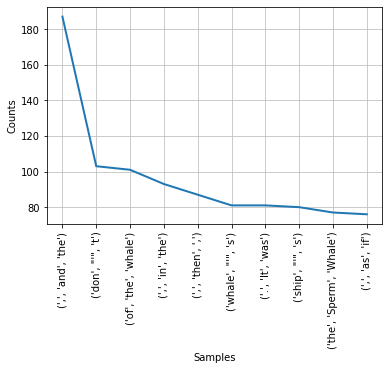

In [70]:
fdist.plot(10);

# Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [71]:
md_bigrams = list(bigrams(text1))

threshold = 2
#distribution of bi-grams
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)
#distribution of words
filtered_words = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

bi_gram    word_0        word_1  bi_gram_freq  word_0_freq  \
0      (the, affectionate)       the  affectionate             1        13721   
1              (His, bone)       His          bone             1           54   
2       (fleet, carefully)     fleet     carefully             1           10   
3           (dark, fellow)      dark        fellow             1           58   
4         (his, ponderous)       his     ponderous             1         2459   
...                    ...       ...           ...           ...          ...   
67937      (thousand, men)  thousand           men             2           51   
67938          (who, from)       who          from             1          319   
67939     (SPOUTING, FISH)  SPOUTING          FISH             1            1   
67940      (Quaker, style)    Quaker         style             1           10   
67941         (its, peace)       its         peace             1          372   

       word_1_freq  
0                4  
1               50  
2               10  
3               53  
4               13  
...            ...  
67937          236  
67938         1052  
67939            3  
67940            5  
67941            7  

[67942 rows x 6 columns]

# Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [72]:
print(np.log2(1/(13721*4)))
print(np.log2(1))

-15.744098009928038
0.0


In [73]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

bi_gram    word_0        word_1  bi_gram_freq  word_0_freq  \
0      (the, affectionate)       the  affectionate             1        13721   
1              (His, bone)       His          bone             1           54   
2       (fleet, carefully)     fleet     carefully             1           10   
3           (dark, fellow)      dark        fellow             1           58   
4         (his, ponderous)       his     ponderous             1         2459   
...                    ...       ...           ...           ...          ...   
67937      (thousand, men)  thousand           men             2           51   
67938          (who, from)       who          from             1          319   
67939     (SPOUTING, FISH)  SPOUTING          FISH             1            1   
67940      (Quaker, style)    Quaker         style             1           10   
67941         (its, peace)       its         peace             1          372   

       word_1_freq        PMI  log(bi_gram_freq)  
0                4 -15.744098                0.0  
1               50 -11.398744                0.0  
2               10  -6.643856                0.0  
3               53 -11.585901                0.0  
4               13 -14.964296                0.0  
...            ...        ...                ...  
67937          236 -12.555068                1.0  
67938         1052 -18.356332                0.0  
67939            3  -1.584963                0.0  
67940            5  -5.643856                0.0  
67941            7 -11.346514                0.0  

[67942 rows x 8 columns]

In [74]:
df.sort_values(by = 'PMI', ascending=False)

bi_gram          word_0      word_1  bi_gram_freq  \
36080  (conflicting, aptitudes)     conflicting   aptitudes             1   
48016    (strenuous, exertions)       strenuous   exertions             1   
42279             (Pusie, Hall)           Pusie        Hall             1   
38150  (unhesitatingly, expert)  unhesitatingly      expert             1   
3855     (sneaking, Temperance)        sneaking  Temperance             1   
...                         ...             ...         ...           ...   
60684                (man, the)             man         the             1   
65976               (some, the)            some         the             1   
35089                (one, the)             one         the             1   
52783                (the, not)             the         not             1   
33723                (the, but)             the         but             1   

       word_0_freq  word_1_freq        PMI  log(bi_gram_freq)  
36080            1            1   0.000000                0.0  
48016            1            1   0.000000                0.0  
42279            1            1   0.000000                0.0  
38150            1            1   0.000000                0.0  
3855             1            1   0.000000                0.0  
...            ...          ...        ...                ...  
60684          508        13721 -22.732783                0.0  
65976          578        13721 -22.919024                0.0  
35089          889        13721 -23.540138                0.0  
52783        13721         1103 -23.851315                0.0  
33723        13721         1113 -23.864336                0.0  

[67942 rows x 8 columns]

In [80]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'], 
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values, 
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
fig.show()

# Medidas pre-construidas en NLTK

In [90]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [91]:
finder.apply_freq_filter(20)     #Mejores frecuencias de 20 en adelante
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# Textos en Español 

In [92]:
# descargamos corpus en español  https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents() 
corpus

[nltk_data] Downloading package cess_esp to C:\Users\Rodrigo
[nltk_data]     Cooper\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]

In [93]:
flatten_corpus = [w for l in corpus for w in l]

In [94]:
print(corpus[0])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.']


In [95]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [96]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

# Referencias para seguir aprendiendo


*   [Mas sobre Colocaciones con NLTK](http://www.nltk.org/howto/collocations.html)
*   

